<a href="https://colab.research.google.com/github/Vanshikajainn/Crop-Monitoring-System-Using-IOT/blob/main/crop_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

<h3>Understanding the Dataset 💽</h3>


In [ ]:
data_path = '/content/Crop_recommendation_veg.csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,tomato
1,85,58,41,21.770462,80.319644,7.038096,226.655537,tomato
2,60,55,44,23.004459,82.320763,7.840207,263.964248,tomato
3,74,35,40,26.491096,80.158363,6.980401,242.864034,tomato
4,78,42,42,20.130175,81.604873,7.628473,262.717340,tomato


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2095,87,44,43,23.874845,86.792613,6.718725,177.514731,onion
2096,88,52,39,23.928879,88.071123,6.880205,154.660874,onion
2097,90,39,37,24.814412,81.686889,6.861069,190.788639,onion
2098,90,39,43,24.447439,82.286484,6.769346,190.968489,onion
2099,84,38,43,26.574217,73.819949,7.261581,159.322307,onion


In [ ]:
print(f"Rows, Cols = {df.shape}")
print(f"Rows * Cols = {df.size}")

Rows, Cols = (2100, 8)
Rows * Cols = 16800


In [ ]:
# The features of our dataset
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# The labels on which recommendation will be performed
df['label'].unique()

array(['tomato', 'cauliflower', 'pumpkin', 'cabbage', 'eggplant',
       'cucumber', 'spinach', 'beetroot', 'capsicum', 'basil',
       'ladyFinger', 'chilli', 'lettuce', 'corn', 'peas', 'apple',
       'orange', 'potato', 'carrot', 'raddish', 'onion'], dtype=object)

<Axes: >

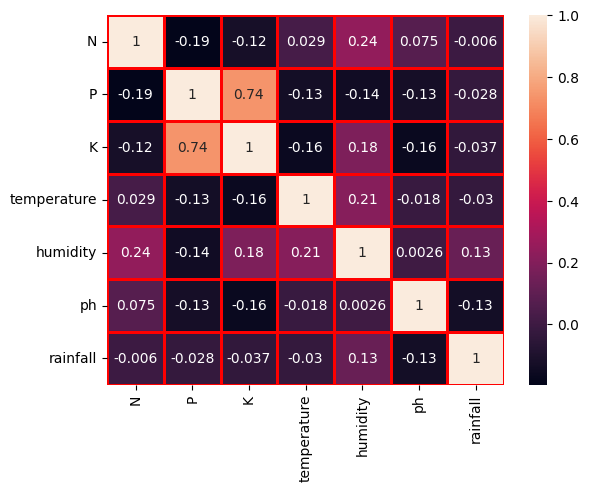

In [ ]:
# Making a heatmap of the dataset correlation : including only numerical data
linewidth = 2
linecolor = "red"

sns.heatmap(data=df.select_dtypes(include='number').corr(),
            annot=True,
            linewidth = linewidth,
            linecolor = linecolor)

In [ ]:
from sklearn.model_selection import train_test_split
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

xtrain, xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size = 0.2,
                                                random_state = None)

In [ ]:
# Defining a dictionary such that key = modelname and value = accuracy of the model
best_model = {}

<h3>Cross Validation Accuracy</h3>

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val_accuracy(model):
    # This function calculates the mean cross validation accuracy
    score = cross_val_score(model, features, target,cv=5)
    #get the mean of each fold
    return score.mean() * 100

<h3>Saving the models 📦</h3>

In [ ]:
import pickle

def save_model(model, modelname):
    #This function expects a model and a modelname(with .pkl extension)
    # Setting model path
    pkl_filename = modelname
    # Open the file to save as pkl file
    model_pkl = open(pkl_filename, 'wb')
    #dump model
    pickle.dump(model, model_pkl)
    # Close the pickle instances
    model_pkl.close()

<h3>Logistic Regression</h3>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the scaled training data
logreg.fit(xtrain_scaled, ytrain)

# Use the model to make predictions on the test data
ypred = logreg.predict(xtest_scaled)

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Logistic Regression"] = accuracy*100
print(best_model)

Accuracy: 0.969047619047619

{'Logistic Regression': 96.9047619047619}


In [ ]:
from sklearn.pipeline import make_pipeline

# Create a pipeline with data scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform cross-validation and calculate accuracy
score = cross_val_score(pipeline, features, target, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-Validation Accuracy Scores:", score.mean() * 100)

Cross-Validation Accuracy Scores: 97.09523809523809


In [ ]:
save_model(logreg,'logreg.pkl')

<h3>Decision Tree 🌳</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = "entropy",
                                     random_state = None,
                                     max_depth = 5)
# Fitting the training set to create a model
DecisionTree.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = DecisionTree.predict(xtest)
# Checking whether the predicted y for test(x) matches actual test(y)
accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Decision Tree"] = accuracy*100
print(best_model)

Accuracy: 0.9357142857142857

{'Logistic Regression': 96.9047619047619, 'Decision Tree': 93.57142857142857}


In [ ]:
print(f"Cross Validation Accuracy {cross_val_accuracy(DecisionTree)}")

Cross Validation Accuracy 93.80952380952381


In [ ]:
# save_model(DecisionTree,'DecisionTree.pkl')

<h3>Random Forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=None)

# Fitting the training set to create a model
RandomForest.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = RandomForest.predict(xtest)

accuracy = metrics.accuracy_score(ypred, ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Random Forest"] = accuracy*100
print(best_model)

Accuracy: 0.9976190476190476

{'Logistic Regression': 96.9047619047619, 'Decision Tree': 93.57142857142857, 'Random Forest': 99.76190476190476}


In [ ]:
print(f"Cross Validation Accuracy {cross_val_accuracy(RandomForest)}")

Cross Validation Accuracy 99.33333333333334


In [ ]:
save_model(RandomForest,'RandomForest.pkl')

<h3> Gaussian Naive Bayes ⚾️🥎</h3>


In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

# Fitting the training set to create a model
NaiveBayes.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = NaiveBayes.predict(xtest)

accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Naive Bayes"] = accuracy*100
print(best_model)

Accuracy: 0.9952380952380953

{'Logistic Regression': 96.9047619047619, 'Decision Tree': 93.57142857142857, 'Random Forest': 99.76190476190476, 'Naive Bayes': 99.52380952380952}


In [ ]:
print(f"Cross Validation Accuracy {cross_val_accuracy(NaiveBayes)}")

Cross Validation Accuracy 99.47619047619047


In [ ]:
save_model(NaiveBayes,'NaiveBayes.pkl')

<h3>Support Vector Machine</h3>

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
ypred = SVM.predict(x_test_norm)

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["SVM"] = accuracy*100
print(best_model)

Accuracy: 0.9857142857142858

{'Logistic Regression': 96.9047619047619, 'Decision Tree': 93.57142857142857, 'Random Forest': 99.76190476190476, 'Naive Bayes': 99.52380952380952, 'SVM': 98.57142857142858}


In [ ]:
print(f"Cross Validation Accuracy {cross_val_accuracy(SVM)}")

Cross Validation Accuracy 98.3809523809524


In [ ]:
save_model(SVM,'SVM.pkl')

<h3>XG Boost 🚀</h3>

In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y' into integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(ytrain)

# Create and fit the XGBoost classifier
XGB = xgb.XGBClassifier()
XGB.fit(xtrain, y_encoded)

# Predict the labels for the test set
ypred = XGB.predict(xtest)

# Decode the predicted labels back to their original string labels
ypred_decoded = label_encoder.inverse_transform(ypred)

# Calculate and print the accuracy
accuracy = metrics.accuracy_score(ytest, ypred_decoded)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["XGB"] = accuracy*100
print(best_model)

Accuracy: 0.9904761904761905

{'Logistic Regression': 96.9047619047619, 'Decision Tree': 93.57142857142857, 'Random Forest': 99.76190476190476, 'Naive Bayes': 99.52380952380952, 'SVM': 98.57142857142858, 'XGB': 99.04761904761905}


<h3> Tensorflow </h3>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the target labels and transform them
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

# Build the model
model = Sequential()
# Shape (None,7)
model.add(Dense(64, activation='relu', input_shape=(7,)))
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callback
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
            self.model.stop_training = True

# Create an instance of the callback
callback = AccuracyCallback()

# Train the model with the encoded target labels and the callback
model.fit(xtrain_scaled, ytrain_encoded, epochs=20, batch_size=32, validation_data=(xtest_scaled, ytest_encoded), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(xtest_scaled, ytest_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/20
53/53 [==============================] - 1s 7ms/step - loss: 2.2891 - accuracy: 0.3958 - val_loss: 1.2515 - val_accuracy: 0.6905
Epoch 2/20
53/53 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.8167 - val_loss: 0.3616 - val_accuracy: 0.9048
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.9119 - val_loss: 0.1791 - val_accuracy: 0.9357
Epoch 4/20
53/53 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.9411 - val_loss: 0.1577 - val_accuracy: 0.9571
Epoch 5/20
53/53 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.9595 - val_loss: 0.1596 - val_accuracy: 0.9405
Epoch 6/20
53/53 [==============================] - 0s 4ms/step - loss: 0.1122 - accuracy: 0.9607 - val_loss: 0.0824 - val_accuracy: 0.9738
Epoch 7/20
53/53 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9625 - val_loss: 0.0889 - val_accuracy: 0.9643
Epoch 8/20
53/53 [==

In [ ]:
best_model['TensorFlow'] = test_acc*100
print(best_model)

{'Logistic Regression': 96.9047619047619, 'Decision Tree': 93.57142857142857, 'Random Forest': 99.76190476190476, 'Naive Bayes': 99.52380952380952, 'SVM': 98.57142857142858, 'XGB': 99.04761904761905, 'TensorFlow': 99.04761910438538}


In [ ]:
# Save the model
model.save("tensorflow_model")

<h3> Comparing all models 📊 </h3>

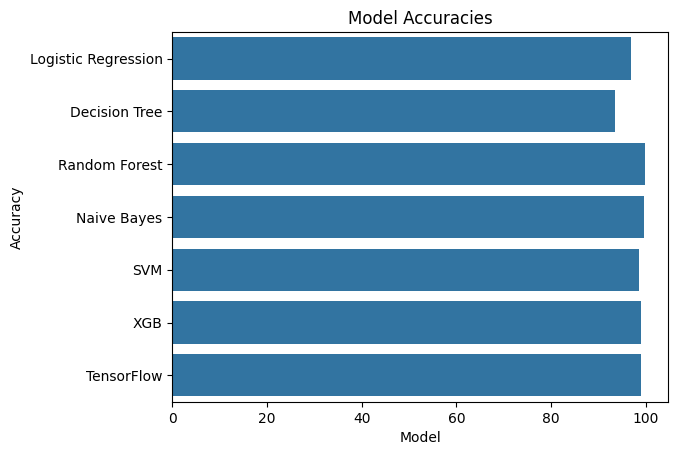

In [ ]:
# Extract model names and accuracies from the best_model dictionary
accuracies = list(best_model.values())
model_names = list(best_model.keys())

# Create a bar plot using seaborn
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


In [ ]:
# Sort the dictionary items by values in descending order
sorted_items = sorted(best_model.items(), key=lambda x: x[1], reverse=True)

# Print the keys and values in descending order
for key, value in sorted_items:
    print(f"{key}: {value}")

Random Forest: 99.76190476190476
Naive Bayes: 99.52380952380952
TensorFlow: 99.04761910438538
XGB: 99.04761904761905
SVM: 98.57142857142858
Logistic Regression: 96.9047619047619
Decision Tree: 93.57142857142857


In [ ]:
max_key = max(best_model, key=best_model.get)
max_value = best_model[max_key]

print(f"Key: {max_key}, Value: {max_value}")

Key: Random Forest, Value: 99.76190476190476


<h3> Using the model 🦾 </h3>

In [ ]:
# Randomly select one row from the DataFrame
random_row = df.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values


      N    P    K  temperature   humidity        ph   rainfall    label
1270  6  140  205    17.665584  82.929034  6.313086  69.867126  lettuce


In [ ]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
prediction = NaiveBayes.predict(data_with_feature_names)
print(prediction)

['lettuce']


In [ ]:
# Randomly select one row from the DataFrame
random_row = df.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values


      N   P   K  temperature   humidity        ph   rainfall        label
121  99  50  15    18.147101  71.094453  5.573286  88.077537  cauliflower


In [ ]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
prediction = NaiveBayes.predict(data_with_feature_names)
print(prediction)

['cauliflower']
